# Project 2: Investigate The Movie Database (TMDb)

The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul>
    <li><a href="#q1">Question #1: Which year and month have the most movie release and are the most profitable? </a>
    <li><a href="#q2">Question #2: Exploring the Movie genres through the years of the dataset </a>
    <li><a href="#q3">Question #3: Top movies based on different attributes </a>
    <li><a href="#q4">Question #4: Top actors, directors and production companies based on the number of movies </a>
    <li><a href="#q5">Question #5: The most favorite movie length and its changes </a>
    <li><a href="#q6">Question #6: Correlations between attributes </a>
</ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Dataset contains:
* Total rows = 10866 
* Total columns = 21 
* The dataset contains a lot of null and zero values

### Research questions:
##### 1. Year and month
> 1.1. Which year has the highest release of movies?  
> 1.2. Which year has the highest profit rate?  
> 1.3. Which month is considered as the most profitable month for movie releases?

##### 2. Genres
> 2.1. Which genres has the highest release of movies?  
> 2.2. Which genres are most popular from year to year?  
> 2.3. How much genres change from year to year?  

###### 3. Movies with top features
> 3.1. Which movies with the highest revenue?  
> 3.2. Which movies with the highest budget?  
> 3.3. Top 10 movies with the highest profits?   
> 3.4. Which movies with the highest popularity?  
> 3.5. Which movies are the most popular from year to year?  
> 3.6. Which movies with the highest average vote?

###### 4. Top actors, directors, production companies
> 4.1. Which actors who frequently appeared in movies?  
> 4.2. Top directors with the highest numbers of movies?  
> 4.3. Top production companies with higher number of release?  

##### 5. Movie length (run time)
> 5.1. Which length movies most liked by the audiences according to their popularity?  
> 5.2. Average runtime of movies from year to year?

##### 6. Correlation
> 6.1. What kinds of properties are associated with movies that have high revenues?


In [47]:
# Import statements for all of the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading the Data

In [48]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

# Print first three rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Printing the Data's data type and dimensions

The TMdb dataset consists of 10866 rows and 21 columns.

In [49]:
# Print the dimensions of the dataset
df.shape

(10866, 21)

In [50]:
# Print the data columns
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [51]:
# Print the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [52]:
# Check and count null values for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Observations from the dataset

> * There are id columns as a unique value corresponding to each row - entry, which on its side represents each movie.
> * There are other columns which describes financial values such budget and revenue. The units of those financial values are not given. Thus, for the sake of this report, I will assume that the currency is in US dollar.
> * Other columns include information like the genre of this movie, the production companies, the release_date, the crowd's votes.
> * The format of release_date should be in datetime, instead of string.
> * The dataset contains lots of movies where the budget or revenue have a value of '0'.
> * The dataset contains many null values.

### Data Cleaning

Based on the above observations, in this part, a trivial data cleaning will be performed as follows. 
* Remove duplicate rows from the dataset
* Change format of release date into datetime format
* Remove columns which are unnecessary in the analysis process
* Remove the movies with zero values of adjusted budget and adjusted revenue.

###### Remove duplicate rows from the dataset

In [53]:
# Check for duplicates
df.duplicated().sum()

1

In [54]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [55]:
# Check again for duplicates 
sum(df.duplicated())

0

###### Change format of release date into datetime format

In [56]:
# Covert 'release_date' from string to datetime 
df['release_date'] = pd.to_datetime(df['release_date'])

###### Remove unused columns
There are 21 columns in the dataset, but some of them are not important and informative for my analysis, for example, imdb_id, overview etc. There are 2 columns for revenue and 2 columns for budget. However, in this report I will only use two columns ending with “_adj” as they show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
Thus, I will drop columns like imdb_id, budget, revenue, homepage, tagline, keywords, overview since they are not required for my analysis.

In [57]:
# Drop unused columns (imdb_id, budget, revenue, homepage, tagline, keywords, overview)
df.drop(['imdb_id','budget','revenue','homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace=True)
df.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

##### Remove the movies with zero values of adjusted budget and adjusted revenue.

In this database of movies, there are lots of movies where the budget or revenue values are of '0'. It could be that the values of those variables of those movies were either not collected or never published. Calculating the profits of these movies would lead to inappropriate results. Thus, the movies with these '0' values will be removed. Moreover, I will also drop all movies with null values in genres, cast and production companies columns for the sake of the analysis process later.

In [58]:
# Remove rows that have nan values
df = df.dropna()

#  Also remove rows where revenue_adj and budget_adj is equal to zero.
df = df[(df.budget_adj !=0) & (df.revenue_adj !=0)]

# Print the dimensions of the cleaned dataset
df.shape

(3805, 14)

In [59]:
# Print the concise summary of the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 445.9+ KB


### Descriptive Statistics
In this section basic descriptive statistics are being presented for each column from the dataset.

In [60]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,1.203784,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.480569,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,0.470651,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1: Which year and month have the most movie release and are the most profitable?
This part will explore and analyse the cleaned dataset to answer four questions about which time movies are most released and which time are most profitable.

#### 1.1. Which year has the highest release of movies?  

In [61]:
# Count the number of movies released each year
yr_most_movies = df.groupby(['release_year']).count()['id']

In [62]:
# Print the top 3 years with the highest release of movies
yr_most_movies.sort_values(ascending=False).head(3)

release_year
2011    196
2013    179
2010    177
Name: id, dtype: int64

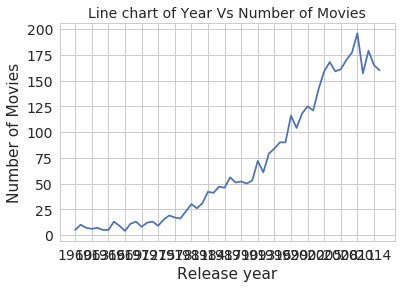

In [63]:
# Plot the line chart of the number of movies by year
yr_most_movies.plot(xticks = np.arange(1960,2016,3))

#set the style sheet
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("whitegrid")
plt.title("Line chart of Year Vs Number of Movies",fontsize = 14)
plt.xlabel('Release year')
plt.ylabel('Number of Movies');

> ***According to the line chart and the output, the year 2011 has the highest release of movies (196) followed by year 2013 (179) and year 2010 (177).***

#### 1.2. Which year has the highest profit rate?

In [64]:
# Calculate profit for each movie
df['profit'] = df['revenue_adj'] - df['budget_adj']

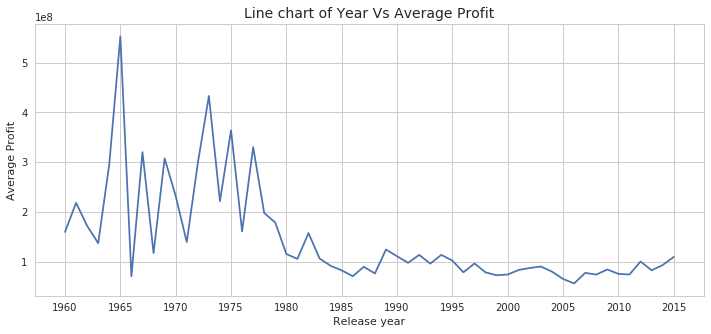

In [65]:
# Calculate yearly average profit
df.groupby('release_year')['profit'].mean().plot(xticks = np.arange(1960,2016,5))
plt.title("Line chart of Year Vs Average Profit", fontsize = 14)
plt.xlabel('Release year')
plt.ylabel('Average Profit');

> ***According to the line chart, the ealier years (1960s - 1970s) are more profitable than the later years between 1980 - 2015.***

#### 1.3. Which month has the highest release of movies? 

In [66]:
# Extract the month number from the release date.
df['release_month'] = df['release_date'].dt.month

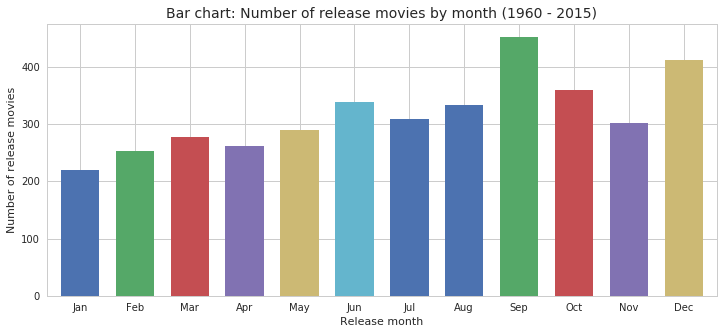

In [67]:
# Count the movies in each month using value_counts()
month_movies = df.groupby('release_month').count()['id']

# Plot a bar chart of Months vs the number of release movies
month_movies.plot.bar(width=0.7)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.title("Bar chart: Number of release movies by month (1960 - 2015)",fontsize = 14)
plt.xlabel('Release month')
plt.xticks(np.arange(0,12), months, rotation =0)
plt.ylabel('Number of release movies');

> ***As can be seen from the bar chart above, there are the higher number of release in September and December.***

#### 1.4. Which month is considered as the most profitable month for movie releases?

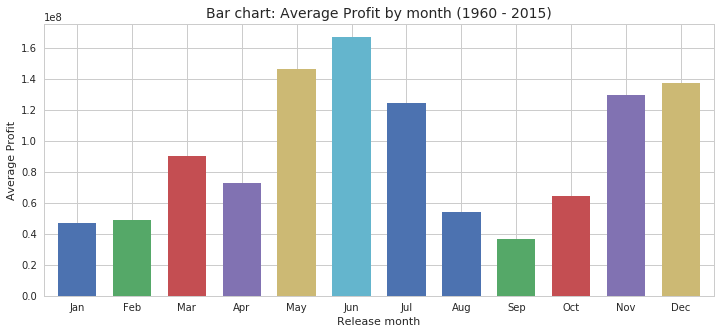

In [68]:
# Calculate an average profit by month
month_profit = df.groupby('release_month')['profit'].mean()

# Plot bar chart for average profit by month
month_profit.plot.bar(width=0.7)
plt.title("Bar chart: Average Profit by month (1960 - 2015)", fontsize = 14)
plt.xlabel('Release month')
plt.xticks(np.arange(0,12), months, rotation =0)
plt.ylabel('Average Profit');

> ***As from the bar chart, movies which were released in the summer months - May, June and July - and in November and December are substaintially more profitable than in other months.***

<a id='q2'></a>
### Research Question 2: Exploring the Movie genres through the years of the dataset

This part contains three sub-questions about the movies' genres over the year of the dataset. First is a question about how many movies per genre were produced from year to year. The second question is to find which genre was the most popular from year to year over these years. The third is how the genres change for year to year. 

Below are codes and graphs to find the answers of the above questions.

#### 2.1. Which genres has the highest release of movies? 

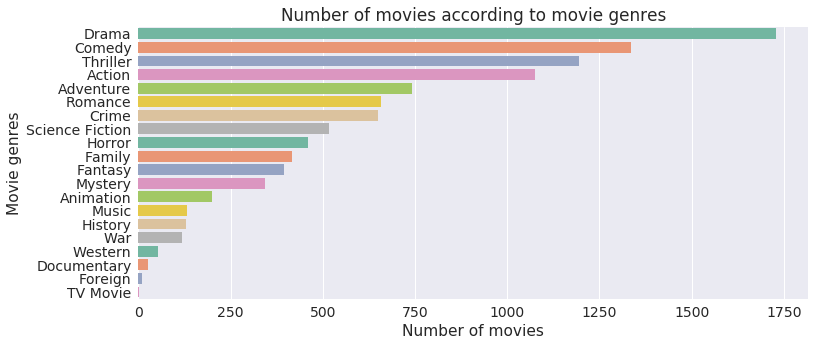

In [69]:
# Split the string and return the count of each genre.
genres_cat = df.genres.str.cat(sep = '|')
genres_series = pd.Series(genres_cat.split('|'))
genres_counts = genres_series.value_counts().sort_values(ascending= False)

# Plot a bar chart using plot function for 'genre vs number of movies'.
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.4)
ax = sns.barplot(y=genres_counts.index, x=genres_counts, palette="Set2")
ax.set(ylabel='Movie genres', xlabel='Number of movies', title = 'Number of movies according to movie genres')
plt.show()


> ***As we can see, Drama movies are the most frequent movie genre produced. In general and according to this dataset the top 3 dominant movie genres all over these years (1960 - 2015) are Drama, Comedy and Thriller.***

#### 2.2. Which genres are most popular from year to year?  

Now lets find out which movie genres are the most popular from year to year and the number of movie release in each genre.

In [70]:
# Extract to create dataframe of year and genres
genres_and_year = df[["genres", "release_year"]]

# Create a set of unique years of movies
year_set = set(genres_and_year.release_year.unique())

# Create a set of unique genres by parsing all the years
genres_set = set()
for year in year_set:
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].str.cat(sep = '|').split('|')
    for genre in genres_in_year:
        if genre not in genres_set:
            genres_set.add(genre)
            
# Create a dataframe which contains the sum of movies' genre per year
genre_count_yearly_df = pd.DataFrame(index = year_set, columns=genres_set)
genre_count_yearly_df.fillna(0, inplace=True)

for year in year_set:
    genres_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].str.cat(sep = '|').split('|')
    for genre in genres_in_year:
        if genre not in genres_dict:
            genres_dict[genre] = 1
        else:
            genres_dict[genre] += 1
    genres_dict_df = pd.DataFrame(genres_dict, index = [year])
    genre_count_yearly_df.loc[year, genres_dict_df.columns] += genres_dict_df.loc[year]
genre_count_yearly_df.head(5)

,Animation,Fantasy,War,Western,Adventure,Mystery,Family,Documentary,TV Movie,Crime,Foreign,Romance,Action,Comedy,Thriller,Horror,Music,Science Fiction,Drama,History
1960,0,0,0,1,1,0,0,0,0,0,0,2,2,2,1,1,0,0,3,1
1961,1,0,1,1,2,0,2,0,0,1,0,1,2,4,0,1,1,0,6,1
1962,0,0,1,2,3,0,0,0,0,1,0,0,2,0,1,0,0,0,5,1
1963,0,0,1,0,2,1,0,0,0,0,0,2,2,1,3,1,0,0,3,3
1964,0,1,1,0,1,1,2,0,0,1,0,2,1,3,2,0,3,0,4,0


In [71]:
# Most popular genre of movies from year to year
most_genre = genre_count_yearly_df.idxmax(axis = 1).values
max_counts = genre_count_yearly_df.apply(max, axis = 1).values
most_pop_genre = pd.DataFrame([most_genre, max_counts], columns = genre_count_yearly_df.index, index = ['genre', 'counts'])
most_pop_genre = most_pop_genre.T
most_pop_genre.T

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,Drama,Drama,Drama,Thriller,Drama,Drama,Adventure,Drama,Drama,Western,...,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
counts,3,6,5,3,4,3,2,7,6,2,...,88,73,78,79,83,87,66,80,79,81


> ***Each year in the table above shows the most popular movie genre and the number of movies in this category.***

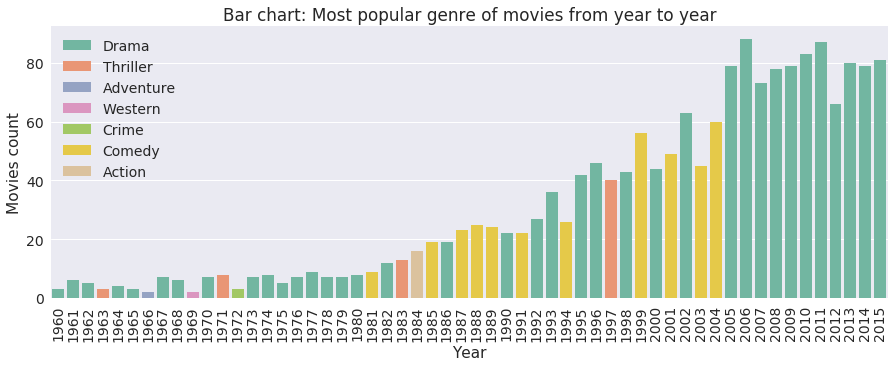

In [72]:
# Plot the most popular genre of movies from year to year
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1.4)
ax = sns.barplot(x=most_pop_genre.index, y = most_pop_genre.counts.values, hue= most_pop_genre.genre.values, 
                 dodge=False, palette ='Set2')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='Movies count', title = 'Bar chart: Most popular genre of movies from year to year')
plt.show();

> ***The bar chart above shows the most 5 popular movie genres, including Drama, Comedy, Thriller, Adventure, History (in the most-popular-to-least order) from year to year and their number of movies that belong to each genre. We can see that Drama is the dominant movie genre most of the time from 1960 - 2004, and always the most popular genre for the last 11 years (2005 - 2015).***

#### 2.3. How much genres change from year to year?
The next 2 figures, show the flactuations of movie genres from year to year. Two different plots were used - bar and area plot - to visualize the movie genres' changes/flactuations/trends from year to year.

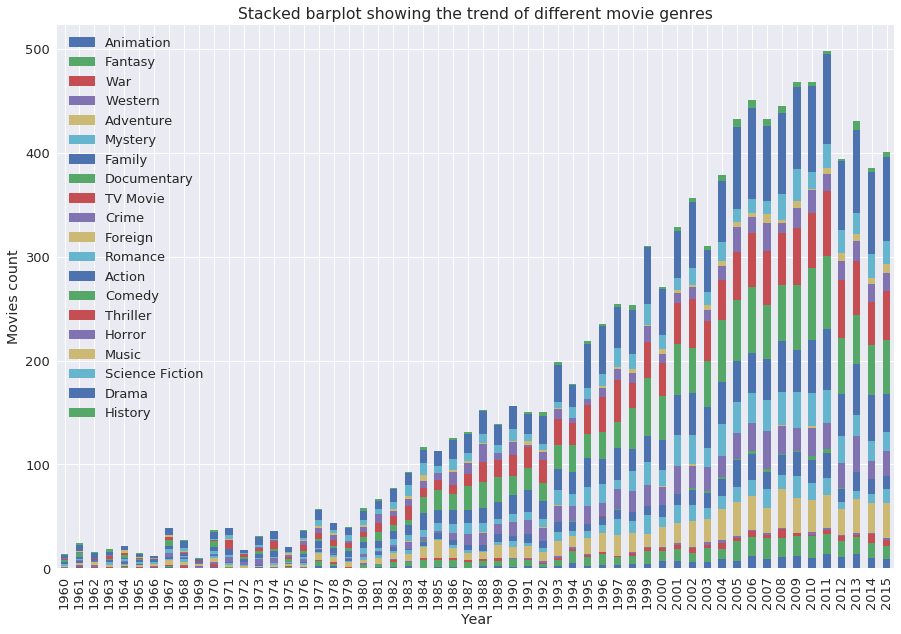

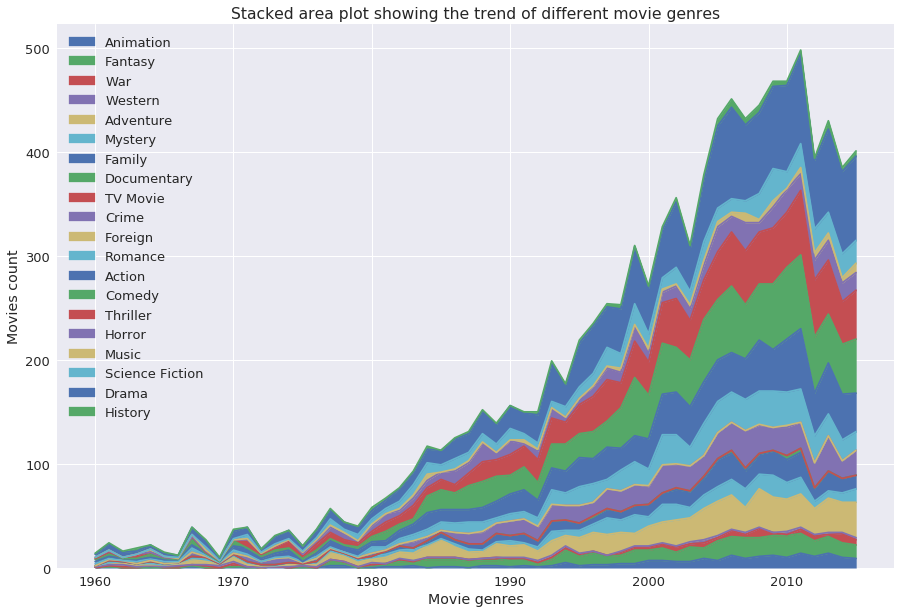

In [73]:
# How much genres change from year to year?
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.3)
sns.set_palette("deep", 20, 1)

ax = genre_count_yearly_df.plot.bar(stacked=True);
ax.set(xlabel='Year', ylabel='Movies count', title='Stacked barplot showing the trend of different movie genres')
plt.show()

ax = genre_count_yearly_df.plot.area(stacked=True);
ax.set(xlabel='Movie genres', ylabel='Movies count', title='Stacked area plot showing the trend of different movie genres')
plt.show()

> ***There are significant increases in both the number of movies in general and consequently the movie release in each genre in particularl from 1960 to 2015. As we can see the majority of the movie genres shows an increasing trend. Drama seems to be the most frequent and prevalent genre in movies through all these years. Othe categories such as Thriller, Comedy and Action movies show a similar pattern.***


<a id='q3'></a>
### Research Question 3: Top movies based on different attributes
Moving to other properties of the TMDb dataset. I will look at which movies have the highest value of the following five different attributes: adjusted revenue, adjusted budget, profit, popularity and average votes.

In [74]:
# Fetching different columns with 2 different ways of code
movies_revenue = df[['original_title', 'revenue_adj']]
movies_budget = df[['original_title', 'budget_adj']]
movies_profit = df[['original_title', 'profit']]
movies_popularity = df[['original_title', 'popularity']]
movies_avg_vote = df[['original_title', 'vote_average']]

#### 3.1. Which movies with the highest revenue?
The following code produce the bar chart representing the top 10 movies based on their adjusted revenue.



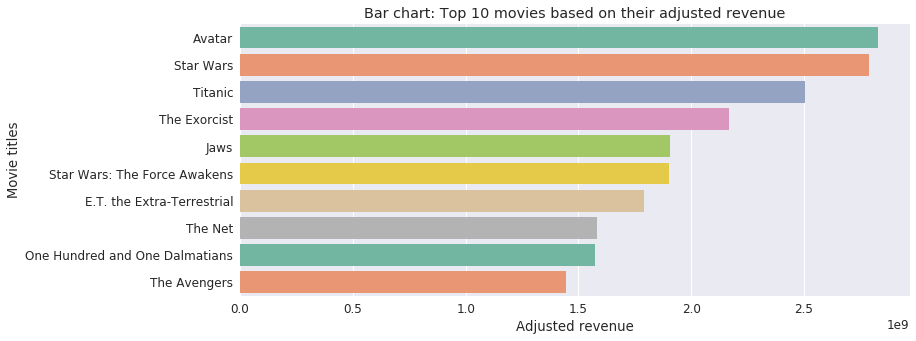

In [75]:
# Top movies with the highest revenue
movies_most_revenue = movies_revenue.sort_values(by='revenue_adj', ascending=False).head(10)

# Plot a bar chart of top 10 movies with highest adjusted revenue
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.2)
ax = sns.barplot(x = movies_most_revenue.revenue_adj,y = movies_most_revenue.original_title, palette="Set2")    
ax.set(ylabel='Movie titles', xlabel='Adjusted revenue', title = 'Bar chart: Top 10 movies based on their adjusted revenue')
plt.show()

> ***According to the chart above, the top 5 movies from the given dataset based on their adjusted revenue are the followings: Avatar, Star Wars, Titanic, The Exorcist and Jaws.***

#### 3.2. Which movies with the highest budget?
The following code produce the bar chart representing the top 10 movies based on their adjusted budget.

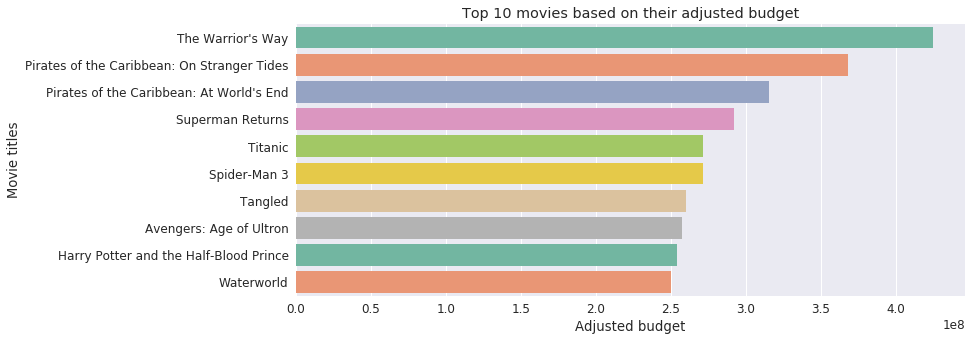

In [76]:
# Top movies with the highest budget
movies_most_budget = movies_budget.sort_values(by='budget_adj', ascending=False).head(10)

# Plot a bar chart of top 10 movies with highest adjusted revenue
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.2)
ax = sns.barplot(y = movies_most_budget.original_title, x = movies_most_budget.budget_adj, palette="Set2")    
ax.set(ylabel='Movie titles', xlabel='Adjusted budget', title = 'Top 10 movies based on their adjusted budget')
plt.show()

> ***According to the chart above, the top 5 movies from the given dataset based on their adjusted budget are the followings: The Warrior's Way, Pirates of the Caribbean: On Strange Tides, Pirates of the Caribbean: At World's Ends, Superman Returns, Titanic.***

#### 3.3. Which movies with the highest profit?
The following code produce the bar chart representing the top 10 movies based on their profit.

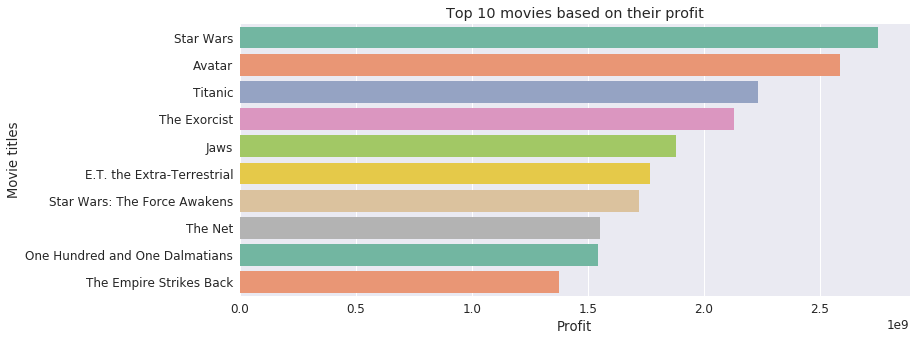

In [77]:
# Top movies with the highest profit
movies_most_profit = movies_profit.sort_values(by='profit', ascending=False).head(10)

# Plot a bar chart of top 10 movies with highest adjusted revenue
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.2)
ax = sns.barplot(y = movies_most_profit.original_title, x = movies_most_profit.profit, palette="Set2")    
ax.set(ylabel='Movie titles', xlabel='Profit', title = 'Top 10 movies based on their profit')
plt.show();

> ***According to the chart above, the top 5 movies from the given dataset based on their profit are the followings: Star Wars, Avatar, Titanic, The Exorcist and Jaws, which are similar to the top 5 with the highest revenue.***

#### 3.4. Which movies with the highest popularity?
The following code produce the bar chart representing the top 10 movies based on their popularity.

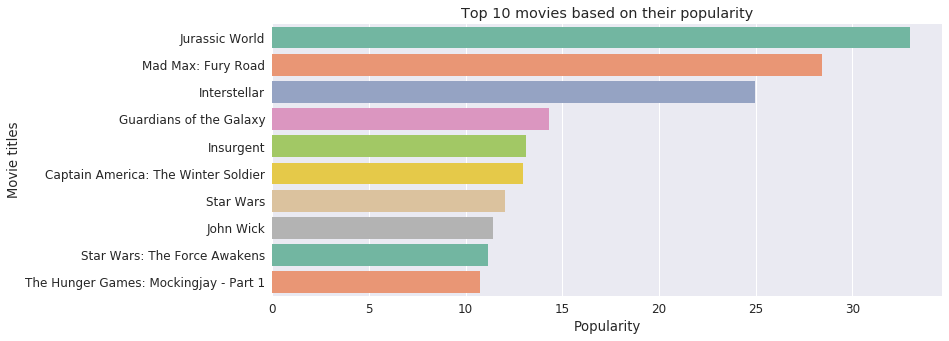

In [78]:
# Top movies with the highest popularity
movies_most_popularity = movies_popularity.sort_values(by='popularity', ascending=False).head(10)

# Plot a bar chart of top 10 movies with highest adjusted revenue
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.2)
ax = sns.barplot(y = movies_most_popularity.original_title, x = movies_most_popularity.popularity, palette="Set2")    
ax.set(ylabel='Movie titles', xlabel='Popularity', title = 'Top 10 movies based on their popularity')
plt.show()

> ***According to the chart above, the top 5 movies from the given dataset based on their popularity are Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent.***

#### 3.5. Which movies with the highest average votes?
The following code produce the bar chart representing the top 10 movies based on their average votes.

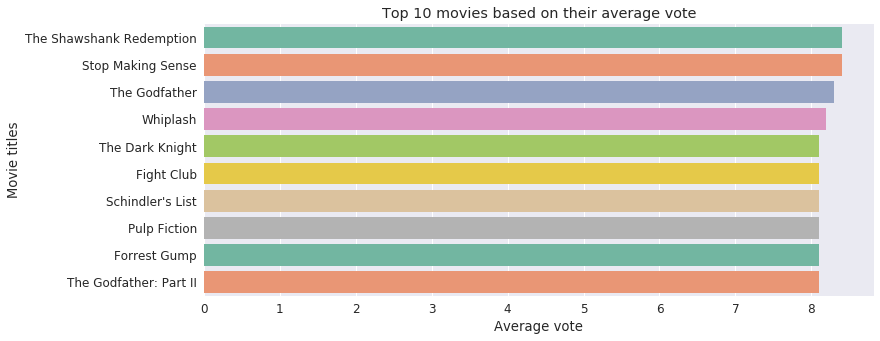

In [79]:
# Top movies with the highest average vote
movies_most_avg_vote = movies_avg_vote.sort_values(by='vote_average', ascending=False).head(10)

# Plot a bar chart of top 10 movies with highest average vote
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.2)
ax = sns.barplot(x = movies_most_avg_vote.vote_average, y = movies_most_avg_vote.original_title, palette="Set2")    
ax.set(xlabel='Average vote', ylabel='Movie titles', title = 'Top 10 movies based on their average vote')
plt.show()

> ***According to the chart above, the top 5 movies from the given dataset based on their average votes are The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash and The Dark Night.***

> **Before plotting those figures above, I expected that there woulld be a correlation between the top movies and especially the top 5 based on the previous attributes (adjusted_revenue, adjusted_budget, profit, popularity and average votes). One of the assumptions, for example, could be that the top 5 movies from feature to feature would be the same. However, the previous figures tell us a different story, in which only top 5 movies with the highest revenue and with the highest profit are similar. Other than that, the top movie lists are different.**

>**We look at the correlation between these features in detail lafter in section 6.**

<a id='q4'></a>
### Research Question 4: Top actors, directors and production companies based on the number of movies.
So far we have looked at the time, numerical and financial attributes. Now, let's explore categorical features such as actors, directors and production companies to find out which actors cast the most, which directors direct the most and which production companies produce the most.

#### 4.1. Which actors who frequently appeared in movies?  

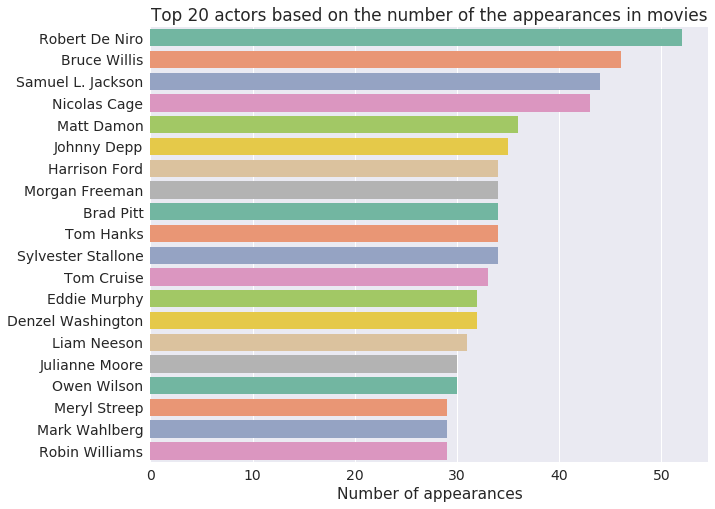

In [80]:
# Split the string and return the count of each actor
actors = df.cast.str.cat(sep = '|').split('|')
actors_count = pd.Series(actors).value_counts().sort_values(ascending= False)
actors_count_df = pd.DataFrame(actors_count, columns = ['appearance_count'])

# Top 20 actors based on their appearance in the movies
actors_top20 = actors_count_df.head(20)

# Plot a bar chart showing the top 20 actors
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.4)
ax = sns.barplot(y=actors_top20.index, x=actors_top20.appearance_count, palette="Set2")
ax.set( xlabel='Number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

> ***The figure above shows that the top 5 frequently appeared actors are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon.***

#### 4.2. Top 10 directors with the highest numbers of movies

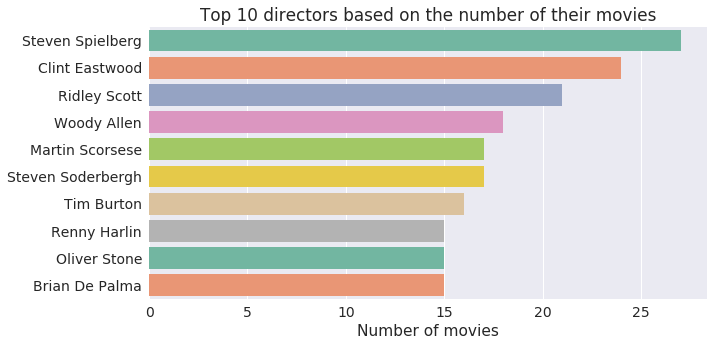

In [81]:
# Top directors with the highest number of movies?

# Top 20 directors with the highest release movies
directors_top10 = df.director.value_counts().sort_values(ascending= False).head(10)

# Plot a bar chart showing the top 10 directors
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.4)
ax = sns.barplot(y=directors_top10.index, x=directors_top10.values, palette="Set2")
ax.set( xlabel='Number of movies', title = 'Top 10 directors based on the number of their movies')
plt.show()

> ***The top 5 directors directing the highest numbers of movies from the above bar chart are Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Martin Scorsese.***

#### 4.3. Top 10 production companies with higher number of release 

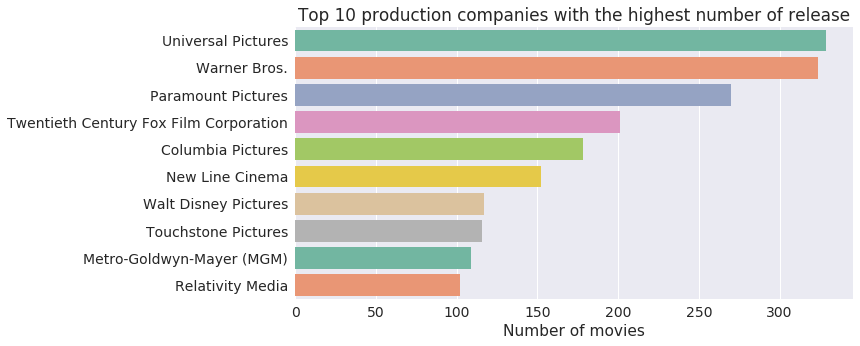

In [82]:
# Split the string and return the count of each production company
prod_company = df.production_companies.str.cat(sep = '|').split('|')
prod_company_count = pd.Series(prod_company).value_counts().sort_values(ascending= False)
prod_company_count_df = pd.DataFrame(prod_company_count, columns = ['movies_count'])

# Top 10 production companies with the highest of release
prod_company_top10 = prod_company_count_df.head(10)

# Plot a bar chart showing the top 10 companies
ax = sns.barplot(y=prod_company_top10.index, x=prod_company_top10.movies_count, palette="Set2")
ax.set( xlabel='Number of movies', title = 'Top 10 production companies with the highest number of release')
plt.show()


> ***The figure above shows that the top 5 production companies consists of Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation and Columbia Pictures.***

<a id='q5'></a>
### Research Question 5: The most favorite movie length and its changes.
In this section, I will analyse what is the most popular movie length over the period of time, and how the average movie length changes from year to year.

#### 5.1. Which movie length most liked by the audiences according to their popularity?  

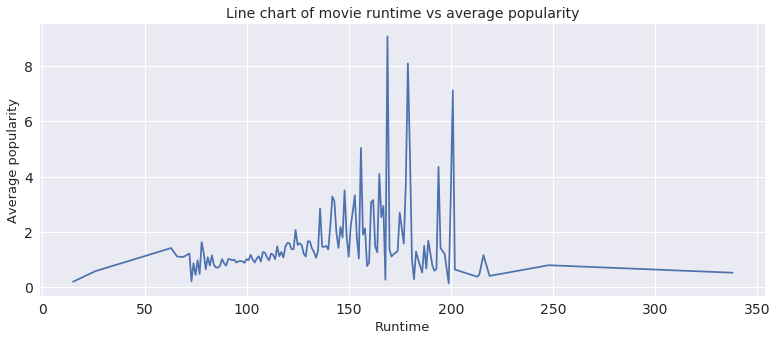

In [83]:
# Group the data by runtime and calculate the mean of popularity based on each group, then plot.
df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5))
plt.xlabel('Runtime', fontsize=13)
plt.ylabel('Average popularity',fontsize=13)
plt.title('Line chart of movie runtime vs average popularity',fontsize=14);

> ***As can be seen from the line chart above, movies with runtime in the range of 120 - 200 are more popular than other runtime movies. The reasons may be that it is boring to see movies which are too long and it is probably not satisfying enough to watch short movies.***

#### 5.2. How much average runtime of movies changes from year to year?

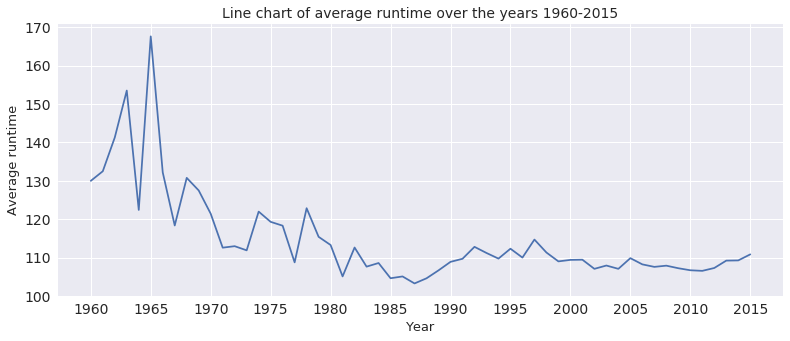

In [84]:
# Group the data by release year and calculate average runtime per year, then plot.
df.groupby('release_year')['runtime'].mean().plot(figsize = (13,5), xticks = np.arange(1960,2016,5))
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average runtime',fontsize=13)
plt.title('Line chart of average runtime over the years 1960-2015',fontsize=14);

> ***According to the plot, movie duration is the longest in 1965 with around 170 minutes and has been decreasing significantly since then. In recent years, the average runtime duration of the movies are less than 2 hours since people nowadays have a much busier life, thus less time for long duration movies. Additionally, it is quite boring to watch a long movie.***

<a id='q6'></a>
### Research Question 6: Correlations between attributes

This section considers correlations between the attributes (adjusted revenue, adjusted budget, profit, popularity and average votes) that were evaluated to find the top 5 movies based on them in the Question 4 part. We were expecting that regardless the features the top 5 movies would be the same. However this notion did not appear. Thus, to investigate how much those features really correlated, we will look at scatterplots with linear regression models and correlations between adjusted revenue, adjusted budget, movies' popularity, average votes and profit, following by the codes below.

#### What kinds of properties are associated with movies that have high revenues?

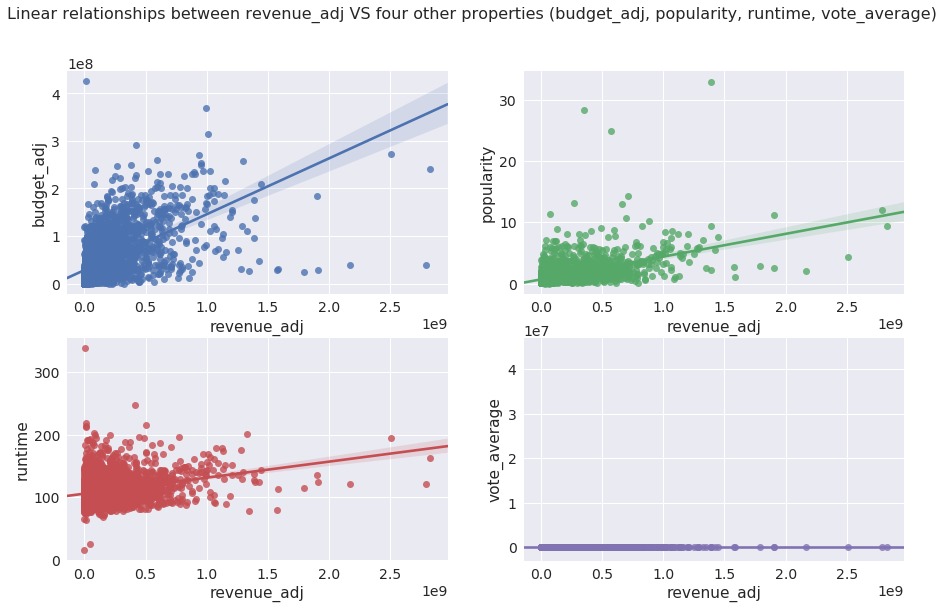

In [85]:
# Use seaborn regression plot to see the linear relationship between
# adjusted revenue and other features (adjusted budget, profit, popularity, runtime and average vote)

# Create a new dataframe of all mentioned features
corr_df = df[['revenue_adj', 'profit','budget_adj','popularity','runtime','vote_average']]

# Functions to draw linear regression models 
# between revenue VS (budget_adj, popularity, runtime, vote_average)
fig, axes = plt.subplots(2,2,figsize = (15,9))
fig.suptitle("Linear relationships between revenue_adj VS four other properties (budget_adj, popularity, runtime, vote_average)",fontsize=16)
sns.regplot(x=corr_df['revenue_adj'], y=corr_df['budget_adj'],ax=axes[0][0])
sns.regplot(x=corr_df['revenue_adj'], y=corr_df['popularity'],ax=axes[0][1])
sns.regplot(x=corr_df['revenue_adj'], y=corr_df['runtime'],ax=axes[1][0])
sns.regplot(x=corr_df['revenue_adj'], y=corr_df['vote_average'],ax=axes[1][1])
sns.set_style("whitegrid")

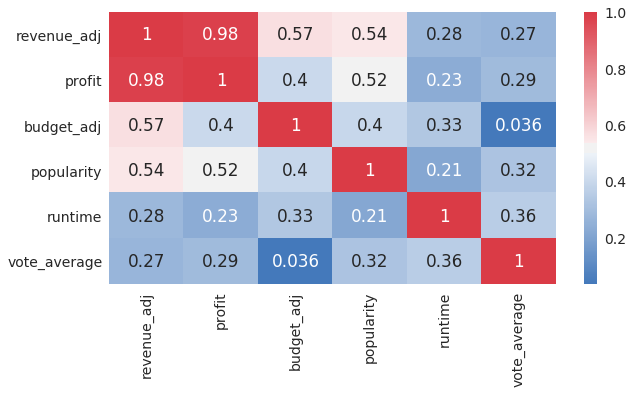

In [86]:
# Calculate the correlations between six features, then plot them on a heatmap graph
corr = corr_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap = sns.diverging_palette(250, 10, as_cmap = True ));

From the above regression plots and correlation heatmap, we can briefly tell that:

***Plot 1: Budget vs Revenue***

> Movies with higher levels of budget tend to generate higher revenues, but the number of movies with high budgets seem scarce. As the correlation between adjusted budget and adjusted revenue is around **0.6**, there is a good possibility that movies with higher investments result in better revenues. 

***Plot 2: Popularity vs Revenue***

> The revenue seems to be increasing with popularity. We can say that there is a moderately positive relationship between popularity and adjusted revenue as as their correlation is **0.54**. In other words, it also means that if the popularity of movie is high then the revenue of the movie may be high.

***Plot 3: Runtime vs Revenue***

> The correlation between adjusted revenue and runtime is **0.28**. So runtime is weakly related to the revenue.
> In other words, I can't find a relationship here. The revenues don't seem to change with the movie lengths.

***Plot 4: Average vote vs Revenue***

> The correlation between adjusted revenue and vote average is **0.27**. So vote average is not highly related to the revenue. It means the revenues don't change with the higher average votes.


 ***Correlation heatmap*** 
> 1. Profit vs Revenue: Profit and adjusted revenue have an almost perfectly positive correlation (**0.98**). It means that movies with higher revenue generate higher profit.
> 2. Profit vs Budget: Profit and adjusted budget have moderately positive correlation (**0.4**). It means there is a good possibility that movies with higher investments result in better profit.
> 3. Popularity vs Profit : Popularity and profit have positive correlation (**0.52**). It means that movie with high popularity tends to earn high profit.

<a id='conclusions'></a>
## Conclusions

After wrangling, cleaning and analyzing the TMDb dataset from 1960 to 2015, I withdraw some conclusions as follows.

* In terms of movie genres, there are 20 unique movie genres, and drama is the most popular genre, following by action, comedy and thriller. Moreover, drama, comedy, thriller and action are four most-made genres through the studied period.

* Maximum number of movies release is in year 2011, while 1965 is the most profitable year. 

* Summer months (May, June, July) and winter months (November and December) are the most profitable months for releasing movies. Thus, companies should take those months into consideration when reasling their new movies.

* 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.

* There are many famous actors like Robert De Niro who casted in many films all over these years.

* Universal Pictures, Warner Bros. and Paramount Pictures production companies produce the most and probabla earn more than other production companies.

* Two hour long movies are more popular than too long or too short duration movies. Average runtime of the movies are decreasing year by year.

* Finally there is a positive correlation between some of the features of the TMDb dataset.

    * Revenue is directly and positivaly connected to the budget and profit.
    * The more popular movies have shown a corresponding increase in revenue and hence profit.

### Limitations

The original dataset contains rich information with more than 10,000 observations. However, there are a large number of null and zero values in different columns. These zero and null values trouble the analysis, hence the observations with those zero and null values have to be removed. For instance, null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values create extreme outliners and false results during the correlation plots. Therefore, data cleaning is a necessary part before moving on to the dataset's investigation.

Moreover, the mentioned conclusions may be incorrect due to the removal of rows with zero values in adjusted budget and revenue. I dropped around two third of the observations, which may lead to the fact that some useful information contained in those rows would be missing. Or it is even worse when the conclusions withdrawn from a third left of the observations could be misleading and could not depict whole the population.

Last but not least, during the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.

## Submitting your Project 

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Reference

Changing width of bars in bar chart created using seaborn.factorplot
https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot

How to plot mix grid: https://seaborn.pydata.org/tutorial/axis_grids.html

Visualizing regression models: https://seaborn.pydata.org/tutorial/regression.html

Python Seaborn jointplot does not show the correlation coefficient and p-value on the chart: https://stackoverflow.com/questions/52118245/python-seaborn-jointplot-does-not-show-the-correlation-coefficient-and-p-value-o

Plot correlation matrix using pandas: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas